In [2]:
import requests

# Set FRB name
frb = "FRB20"

# Make GET request to FRBSTATS
response = requests.get("https://www.herta-experiment.org/frbstats/api/search?frb=" + frb)
# Check status code and print JSON-parsed response
if response.status_code == 200:
    print(response.json())


[{'frb': 'FRB 20180924B', 'utc': '2018-09-24 16:23:13', 'mjd': '58385.68279', 'telescope': 'ASKAP', 'ra': '21:44:25.255', 'dec': '-40:54:00.10', 'l': '0.74', 'b': '-49.41', 'frequency': '1320', 'dm': '361.42', 'flux': '12.3', 'width': '1.3', 'fluence': '16', 'snr': '194', 'ref': 'https://www.wis-tns.org/object/20180924b', 'redshift': '0.3603', 'redshift_measured': '0.3214', 'ra_error': '-', 'dec_error': '-', 'dm_error': '0.06'}, {'frb': 'FRB 20180131A', 'utc': '2018-01-31 5:45:04', 'mjd': '58149.23963', 'telescope': 'ASKAP', 'ra': '21:49:54.000', 'dec': '-40:40:60.00', 'l': '0.93', 'b': '-50.47', 'frequency': '1297', 'dm': '657.7', 'flux': '22.2', 'width': '4.5', 'fluence': '100', 'snr': '13.8', 'ref': 'https://www.wis-tns.org/object/20180131a', 'redshift': '0.6338', 'redshift_measured': '-', 'ra_error': '12', 'dec_error': '8', 'dm_error': '0.5'}, {'frb': 'FRB 20200627A', 'utc': '2020-06-27 19:23:42', 'mjd': '59027.80812', 'telescope': 'ASKAP', 'ra': '21:47:00.000', 'dec': '-39:28:60.0

In [66]:
from datetime import datetime
format = "%H:%M:%S.%f"
from astropy import units as u
from astropy.coordinates import SkyCoord
import json

jsonFRB= json.loads(response.text)
class obj:
     
    # constructor
    def __init__(self, dict1):
        self.__dict__.update(dict1)
  
def dict2obj(dict1):
     
    # using json.loads method and passing json.dumps
    # method and custom object hook as arguments
    return json.loads(json.dumps(dict1), object_hook=obj)
    
# initializing the dictionary 

  
# calling the function dict2obj and
# passing the dictionary as argument
FRBS = []
for item in jsonFRB:
    FRBS.append(dict2obj(item))

print(len(FRBS))
dms =[]
for items in FRBS:
    dms.append(float((items.dm)))
    
fluxes = []
for items in FRBS:
    if items.flux == '-':
        fluxes.append(None)
    else:
        fluxes.append(float((items.flux)))
        
coords = []
for items in FRBS:
    if items.ra == '-':
        coords.append(None)
    else:
        coords.append(SkyCoord(items.ra,items.dec, unit = (u.hourangle, u.deg)))
ras = []
for items in coords:
    if items.ra == '-':
        ras.append(None)
    else:
        ras.append(items.ra.wrap_at(180*u.degree))
                           
decs = []
for items in coords:
    if items.ra == '-':
        decs.append(None)
    else:
        decs.append(items.dec)
        

print(len(fluxes))
print(len(dms))
print(len(coords))
print(len(ras))
print(len(decs))

print(SkyCoord('21:44:25.255','-40:54:00.10', unit = (u.hourangle, u.deg)))

826
826
826
826
826
826
<SkyCoord (ICRS): (ra, dec) in deg
    (326.10522917, -40.90002778)>


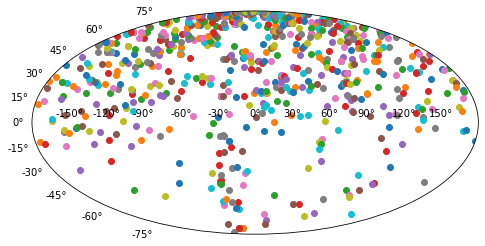

In [62]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
for x in range(826):
    ax.scatter(ras[x].radian, decs[x].radian)


In [65]:
for x in range(10):
    print(ras[x], decs[x])
for x in range(10):
    print(coords[x].ra, coords[x].dec)

-33d53m41.175s -40d54m00.1s
-32d31m30s -40d41m00s
-33d15m00s -39d29m00s
-31d57m00s -38d34m00s
-102d45m00s -15d36m00s
-113d13m30s -7d27m48s
-9d00m00s -33d31m00s
-31d45m00s -35d27m00s
-38d49m03s -33d58m44.5s
-7d32m30s -32d27m00s
326d06m18.825s -40d54m00.1s
327d28m30s -40d41m00s
326d45m00s -39d29m00s
328d03m00s -38d34m00s
257d15m00s -15d36m00s
246d46m30s -7d27m48s
351d00m00s -33d31m00s
328d15m00s -35d27m00s
321d10m57s -33d58m44.5s
352d27m30s -32d27m00s


<AxesSubplot:xlabel='flux', ylabel='DM'>

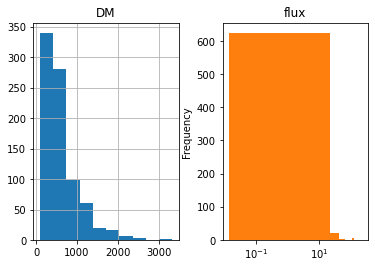

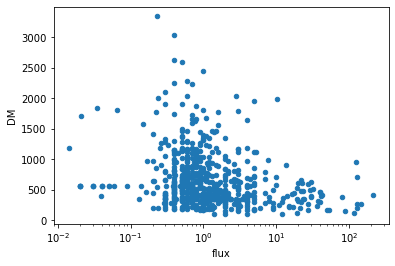

In [56]:
import pandas as pd
FRBprops= pd.DataFrame({"DM":dms,"flux": fluxes, "coord":coords,"ra":ras, "dec":decs })

FRBprops.hist()
FRBprops["flux"].plot(kind = "hist", logx =True)

FRBprops.plot.scatter(x="flux",logx=True, y ="DM")

